# **Analysis on the Real Estate Sales between 2001-2022 in Connecticut**


---

This notebook explores two decades of real estate sales data across Connecticut, as reported by the Office of Policy and Management. Covering the period from 2001 to 2022, the dataset includes detailed records of property sales valued at $2,000 or more, spanning residential, commercial, industrial, apartment, and vacant land types.

---

## **Motivation**

Understanding long-term real estate trends provides critical insights into economic cycles, housing market shifts, urban development, and community growth. With real estate being a key economic indicator and asset class, this analysis aims to uncover how sales volumes, prices, and property types have evolved across towns and over time.

Housing prices tell an important story about how a town is doing. This notebook looks at property sales in Connecticut from 2001 to 2022 to see how the real estate market has changed across time and towns. It shows where prices have gone up, what kinds of homes are selling, and how towns differ in value.

But to really understand why prices rise or fall, we need more than just housing data. That’s why this project also connects with fiscal data (how towns raise money through taxes) and population data (who lives in each town). 



This project aims to answer key questions such as:

- How have property sales prices changed over time in Connecticut?
- Are there regional disparities or hot spots in sales activity?
- Which property types dominate in volume and value?
- What signals might indicate revaluation or market shocks (e.g., 2008 crash, COVID-19)?

The goal is to build a clear, data-driven narrative that reveals meaningful patterns and supports public understanding and policy planning.

---

### Why this dataset?

This dataset was selected due to its comprehensive, multi-year coverage of real estate activity in a single U.S. state, offering granular detail by property type, location, and valuation. Its temporal span captures major economic events like the 2008 housing crisis and the COVID-19 surge, making it ideal for both historical and spatial analysis.

### Goal for end-user experience

The objective was to deliver an interactive, story-driven notebook that not only visualizes trends but also provides rich contextual insights through clear narrative, policy relevance, and intuitive visual exploration.


## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
from folium.features import GeoJsonTooltip
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from bokeh.io import output_notebook, show
from bokeh.io import output_file, save
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import RdYlGn
from bokeh.models import HoverTool
import json

output_notebook()

Loading BokehJS ...

# **Basic stats**

## **Data Overview**
---
The dataset, maintained by the Connecticut Office of Policy and Management, includes all real estate sales valued at $2,000 or greater from 2001–2022. Each record contains the sale date, sales price, property type, address, town, and assessed value. The data are reported by fiscal year (Oct 1 – Sep 30) and reflect both residential and non-residential transactions.

Source: [CT OPM Sales Records](https://catalog.data.gov/dataset/real-estate-sales-2001-2018) 

Each record includes:

- **Town**: Municipality where the sale occurred  
- **Property Address**: Street-level location of the sold property  
- **Date of Sale**: Transaction date, falling between October 1 and September 30 of each grand list year  
- **Property Type**: Category such as Residential, Apartment, Commercial, Industrial, or Vacant Land  
- **Sales Price**: Final transaction price in U.S. dollars  
- **Assessment**: Assessed value of the property used for taxation

Note: Certain municipalities may omit data for specific years due to statutory exemptions following property revaluation.

--- 



## **Data Cleaning & Preproccesing**
---
The following preprocessing operations will be applied to prepare the dataset for analysis:

- Convert sale date entries to standardized datetime format  
- Normalize column names to lowercase with consistent naming conventions  
- Exclude rows with null values or invalid entries in key fields (e.g., sales price, property type)  
- Derive new columns such as the year of sale and sale decade  
- Review property type distribution and address inconsistencies  
- Detect and handle potential outliers in sales price and assessment values

These steps ensure a clean, analyzable dataset aligned with reporting standards and suitable for statistical exploration.

---


In [ ]:
df= pd.read_csv( "Real_Estate_Sales_2001-2022_GL.csv")
df.head()

C:\Users\arund\AppData\Local\Temp\ipykernel_34744\1378112253.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv( "Real_Estate_Sales_2001-2022_GL.csv")


Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    04/14/2021  Ansonia    323 BEAVER ST   
1        2020225       2020    05/26/2021  Ansonia   152 JACKSON ST   
2        2020348       2020    09/13/2021  Ansonia  230 WAKELEE AVE   
3        2020090       2020    12/14/2020  Ansonia      57 PLATT ST   
4         200500       2020    09/07/2021     Avon     245 NEW ROAD   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0       0.5354   Residential    Single Family   
1        110500.0     239900.0       0.4606   Residential     Three Family   
2        150500.0     325000.0       0.4630    Commercial              NaN   
3        127400.0     202500.0       0.6291   Residential       Two Family   
4        217640.0     400000.0       0.5441   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks                    Location  
0          NaN              NaN         NaN  POINT (-73.06822 41.35014)  
1          NaN              NaN         NaN                         NaN  
2          NaN              NaN         NaN                         NaN  
3          NaN              NaN         NaN                         NaN  
4          NaN              NaN         NaN                         NaN

In [3]:
# convert the date column to datetime format
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')


In [4]:
df.head()

Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    2021-04-14  Ansonia    323 BEAVER ST   
1        2020225       2020    2021-05-26  Ansonia   152 JACKSON ST   
2        2020348       2020    2021-09-13  Ansonia  230 WAKELEE AVE   
3        2020090       2020    2020-12-14  Ansonia      57 PLATT ST   
4         200500       2020    2021-09-07     Avon     245 NEW ROAD   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0       0.5354   Residential    Single Family   
1        110500.0     239900.0       0.4606   Residential     Three Family   
2        150500.0     325000.0       0.4630    Commercial              NaN   
3        127400.0     202500.0       0.6291   Residential       Two Family   
4        217640.0     400000.0       0.5441   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks                    Location  
0          NaN              NaN         NaN  POINT (-73.06822 41.35014)  
1          NaN              NaN         NaN                         NaN  
2          NaN              NaN         NaN                         NaN  
3          NaN              NaN         NaN                         NaN  
4          NaN              NaN         NaN                         NaN

In [5]:
df['Assessed Value'] = pd.to_numeric(df['Assessed Value'], errors='coerce')
df['Sale Amount'] = pd.to_numeric(df['Sale Amount'], errors='coerce')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'], errors='coerce')


In [6]:
df.head()

Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    2021-04-14  Ansonia    323 BEAVER ST   
1        2020225       2020    2021-05-26  Ansonia   152 JACKSON ST   
2        2020348       2020    2021-09-13  Ansonia  230 WAKELEE AVE   
3        2020090       2020    2020-12-14  Ansonia      57 PLATT ST   
4         200500       2020    2021-09-07     Avon     245 NEW ROAD   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0       0.5354   Residential    Single Family   
1        110500.0     239900.0       0.4606   Residential     Three Family   
2        150500.0     325000.0       0.4630    Commercial              NaN   
3        127400.0     202500.0       0.6291   Residential       Two Family   
4        217640.0     400000.0       0.5441   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks                    Location  
0          NaN              NaN         NaN  POINT (-73.06822 41.35014)  
1          NaN              NaN         NaN                         NaN  
2          NaN              NaN         NaN                         NaN  
3          NaN              NaN         NaN                         NaN  
4          NaN              NaN         NaN                         NaN

In [7]:
missing_summary = df.isna().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

OPM remarks         1084598
Assessor Remarks     926401
Location             799518
Non Use Code         784178
Residential Type     398389
Property Type        382446
Address                  51
Date Recorded             2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1097629 non-null  int64         
 1   List Year         1097629 non-null  int64         
 2   Date Recorded     1097627 non-null  datetime64[ns]
 3   Town              1097629 non-null  object        
 4   Address           1097578 non-null  object        
 5   Assessed Value    1097629 non-null  float64       
 6   Sale Amount       1097629 non-null  float64       
 7   Sales Ratio       1097629 non-null  float64       
 8   Property Type     715183 non-null   object        
 9   Residential Type  699240 non-null   object        
 10  Non Use Code      313451 non-null   object        
 11  Assessor Remarks  171228 non-null   object        
 12  OPM remarks       13031 non-null    object        
 13  Location          298111 non-null   object

In [9]:
df = df.dropna(subset=['Property Type', 'Date Recorded', 'Address'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715179 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     715179 non-null  int64         
 1   List Year         715179 non-null  int64         
 2   Date Recorded     715179 non-null  datetime64[ns]
 3   Town              715179 non-null  object        
 4   Address           715179 non-null  object        
 5   Assessed Value    715179 non-null  float64       
 6   Sale Amount       715179 non-null  float64       
 7   Sales Ratio       715179 non-null  float64       
 8   Property Type     715179 non-null  object        
 9   Residential Type  699236 non-null  object        
 10  Non Use Code      208965 non-null  object        
 11  Assessor Remarks  149563 non-null  object        
 12  OPM remarks       12290 non-null   object        
 13  Location          226458 non-null  object        
dtypes: datet

In [11]:
missing_summary = df.isna().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

OPM remarks         702889
Assessor Remarks    565616
Non Use Code        506214
Location            488721
Residential Type     15943
dtype: int64

In [12]:
df['Date Recorded'].dt.year.value_counts().sort_index()

Date Recorded
1999        1
2001        6
2003        1
2004        6
2005        3
2006    10977
2007    40955
2008    30749
2009    33457
2010    35715
2011    28892
2012    29427
2013    34223
2014    38112
2015    44940
2016    43681
2017    44607
2018    43084
2019    48348
2020    59139
2021    64440
2022    52735
2023    31681
Name: count, dtype: int64

In [13]:
df = df[(df['Date Recorded'].dt.year >= 2001) & (df['Date Recorded'].dt.year <= 2022)]

In [14]:
df.to_csv('Real_Estate_Sales_Cleaned.csv', index=False)

In [15]:
# total number of records
total_records = df.shape[0]
print(f'Total number of records: {total_records}')

# total number of unique town
unique_towns = df['Town'].nunique()
print(f'Total number of unique towns: {unique_towns}')

# total number of unique property types
unique_property_types = df['Property Type'].nunique()
print(f'Total number of unique property types: {unique_property_types}')


Total number of records: 683497
Total number of unique towns: 170
Total number of unique property types: 11


# EDA

- Total records: `683497`
- Time span: 2001 to 2022
- Number of unique towns: `170`
- Property types: 11 unique categories
- Missing values: Had a certain degree of null and duplicate values, removed them. 

Property Type Distribution — High Quality Plot

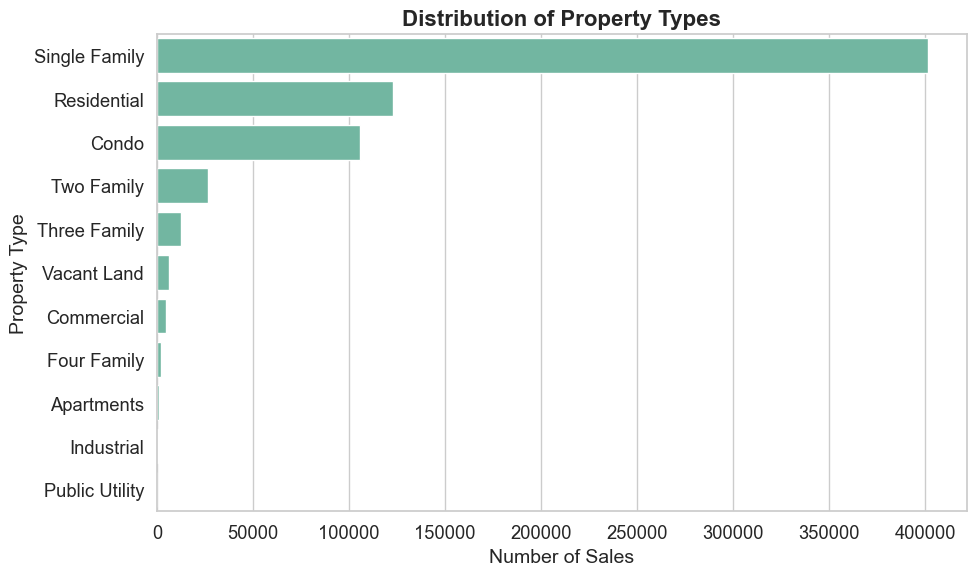

In [16]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)  

sns.countplot(
    data=df,
    y='Property Type',
    order=df['Property Type'].value_counts().index
)

plt.title('Distribution of Property Types', fontsize=16, weight='bold')
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Property Type', fontsize=14)
plt.tight_layout()
plt.show()


## Distribution of Property Types
The chart illustrates the total number of property sales in Connecticut from 2001 to 2022, categorized by property type. Single family homes overwhelmingly dominate the transaction volume, with nearly 400,000 recorded sales. This pattern indicates a strong market preference for detached homeownership and likely reflects long-standing suburban development patterns, local zoning regulations favoring low-density housing, and cultural inclinations toward private residential property.

Residential and condominium properties also account for a substantial share of transactions, each exceeding 100,000 sales. These segments represent a diverse range of privately owned dwellings across urban and suburban settings, highlighting stable demand for housing types beyond traditional single-family homes.

Sales of multi-family properties—such as two-family, three-family, and four-family units—are considerably lower but still reflect notable market activity, particularly in denser municipalities. In contrast, transactions involving vacant land, commercial properties, and public utilities constitute only a small fraction of the dataset. Industrial and apartment sales appear exceptionally rare, likely due to long-term ownership structures, low turnover rates, or the prevalence of rental-based occupancy that limits sales reporting in these categories.

This distribution confirms that the dataset is primarily residential in nature, with limited representation of commercial or industrial sectors. The predominance of single family and owner-occupied residential property types suggests that observed trends in price, volume, and geographic concentration in subsequent analysis will be heavily shaped by the dynamics of the housing market rather than by commercial or institutional investment activity. This initial breakdown provides a critical foundation for understanding long-term real estate patterns in Connecticut and informs the interpretation of temporal, spatial, and economic trends explored in the following sections.


Total Sales Amount by Year — High Quality Plot

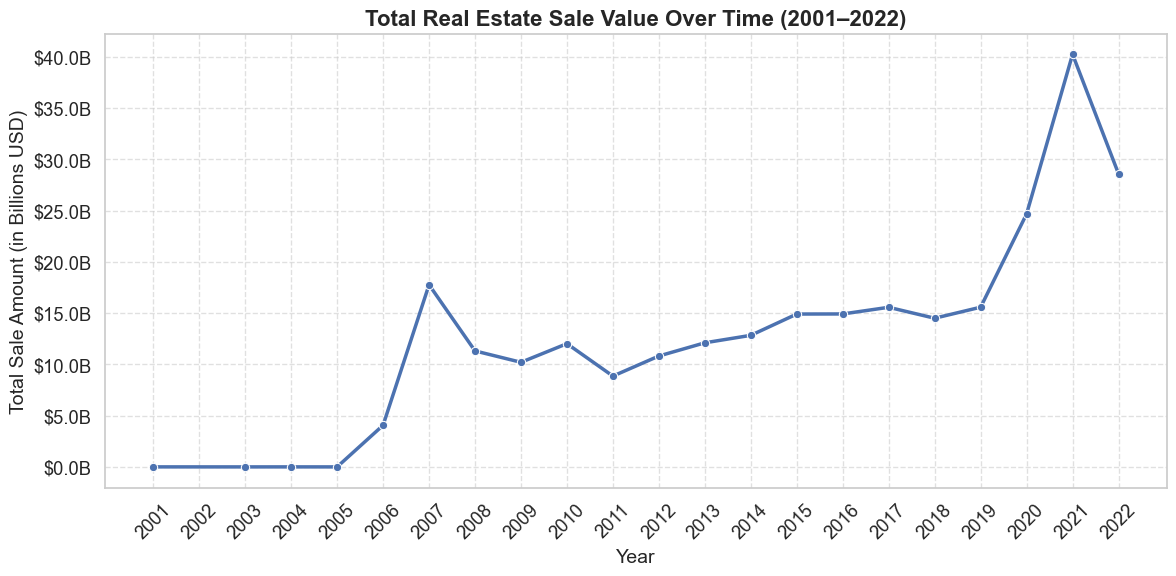

In [17]:


# Format y-axis to show billions (e.g., 3.5B)
def billions(x, pos):
    return f'${x*1e-9:.1f}B'

# Group and sum
sales_by_year = df.groupby(df['Date Recorded'].dt.year)['Sale Amount'].sum()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="deep", font_scale=1.2)

sns.lineplot(
    x=sales_by_year.index,
    y=sales_by_year.values,
    marker='o',
    linewidth=2.5
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))  # Apply custom formatter

plt.xticks(ticks=range(sales_by_year.index.min(), sales_by_year.index.max() + 1), rotation=45)
plt.title('Total Real Estate Sale Value Over Time (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sale Amount (in Billions USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Total Real Estate Sale Value Over Time (2001–2022)

The chart presents the aggregate real estate sale value in Connecticut from 2001 to 2022, measured in billions of USD. The trend reveals several distinct phases in market behavior. From 2001 through 2005, reported sale values remained negligible or unrecorded, possibly due to missing data or incomplete reporting during the early years of digital recordkeeping. A sharp increase occurred in 2006 and 2007, with total sale values peaking at approximately $18 billion, coinciding with the national housing boom prior to the 2008 financial crisis.

Following the 2007 peak, a significant decline is observed in 2008, with a reduction of over 30% in total sale value. This drop aligns with the onset of the global financial crisis, which heavily impacted real estate markets across the United States. From 2009 to 2019, the market experienced a period of relative stabilization, with modest growth and fluctuations between $9 billion and $15 billion in annual sales. This plateau likely reflects the gradual recovery of housing markets and restrained investment activity during the post-recession period.

A notable inflection point occurred in 2020, where total sales surged beyond $25 billion, followed by a dramatic peak in 2021 reaching over $40 billion. This unprecedented growth corresponds with pandemic-related factors, including low interest rates, increased housing demand, and a shift in buyer preferences toward suburban and rural properties. However, in 2022, a sharp correction is evident, with total sales retreating by approximately 25%, potentially indicating early effects of rising interest rates and inflationary pressures.

The overall trend illustrates the sensitivity of Connecticut’s real estate market to macroeconomic events, including financial crises and public health disruptions. These findings provide critical temporal context for understanding shifts in sales volume, pricing behavior, and investment cycles. The timeline also establishes key turning points that can inform deeper property-type and town-level analyses in subsequent sections.


Median Sale Price by Year

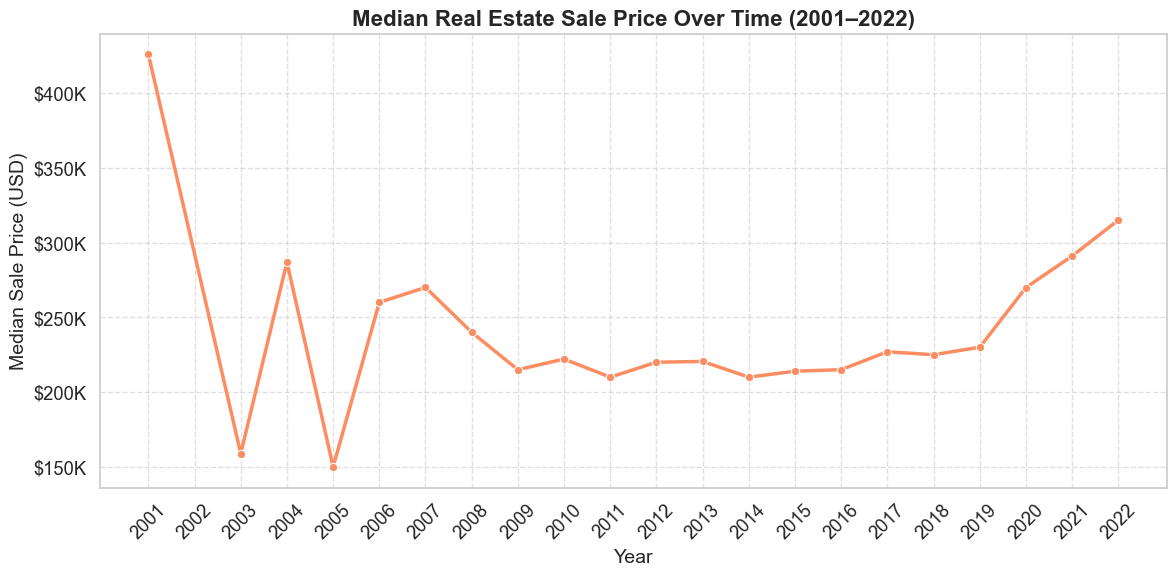

In [18]:
# Formatter for thousands (K)
def thousands(x, pos):
    return f'${x*1e-3:.0f}K'

# Group and compute median sale amount per year
median_prices = df.groupby(df['Date Recorded'].dt.year)['Sale Amount'].median()

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

sns.lineplot(
    x=median_prices.index,
    y=median_prices.values,
    marker='o',
    linewidth=2.5,
    color=sns.color_palette("Set2")[1]  # Choose a distinct Set2 color
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))  # Apply thousands formatter

plt.xticks(ticks=range(median_prices.index.min(), median_prices.index.max() + 1), rotation=45)

plt.title('Median Real Estate Sale Price Over Time (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Sale Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Median Real Estate Sale Price Over Time (2001–2022)

The chart displays the annual median real estate sale price in Connecticut from 2001 to 2022. The values fluctuate within a range of approximately $150,000 to $430,000. The 2001 data point exhibits an anomalously high median price exceeding $430,000, which may reflect incomplete reporting, skewed sampling, or data entry inconsistencies in the early years of the dataset. Similarly, the abrupt decline in 2002 followed by sharp oscillations between 2003 and 2006 suggests instability or non-standardized reporting prior to 2007.

Beginning in 2007, the trend becomes more consistent. The median sale price peaked around $275,000 at the height of the housing boom before declining during the 2008 financial crisis. From 2009 through 2019, the market entered a prolonged period of price stagnation, with annual medians hovering between $210,000 and $230,000. This plateau likely reflects a combination of conservative lending practices, reduced buyer confidence, and a stable supply-demand environment in the aftermath of the recession.

A substantial upward shift begins in 2020, with the median price rising to approximately $270,000 and continuing to climb sharply through 2022, reaching over $315,000. This recent surge aligns with national trends observed during the COVID-19 pandemic, including increased demand for housing, historically low mortgage rates, and a shift in consumer preference toward suburban and rural living. The rapid acceleration of prices during this period underscores growing affordability challenges and signals a potential overheating in regional real estate markets.

When viewed alongside the total sales volume over time, the median price trend confirms that the Connecticut housing market experienced not only a sharp recovery but also a significant expansion in valuation post-2020. These findings emphasize the importance of monitoring long-term affordability, equity, and access in housing policy discussions.


Median Sale Price by Property Type (Boxplot)

C:\Users\arund\AppData\Local\Temp\ipykernel_34744\720033811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


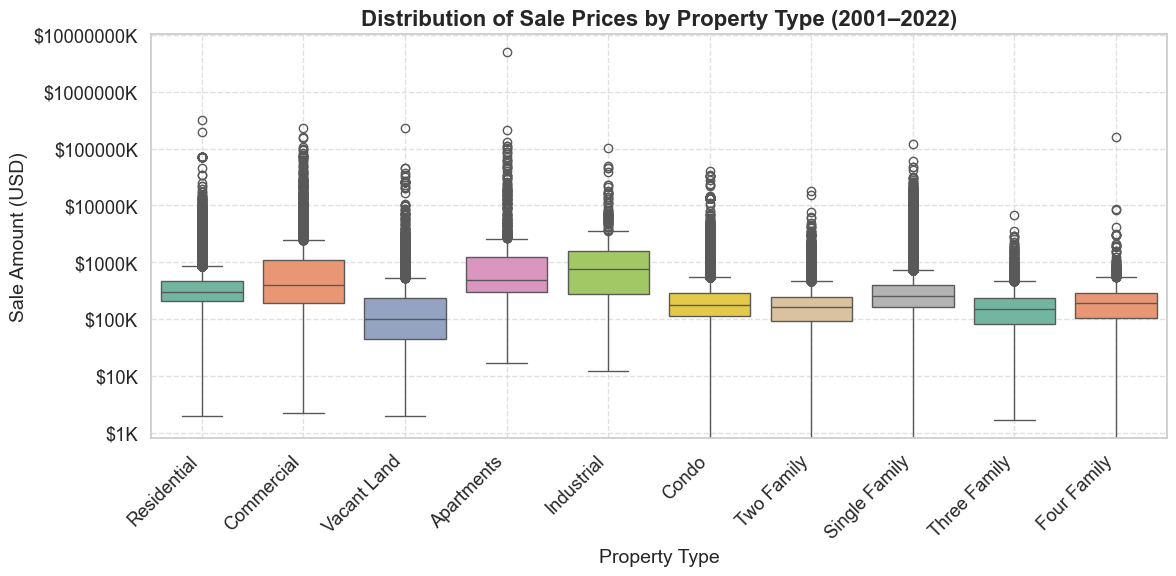

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Filter to major property types (optional if needed for readability)
top_types = df['Property Type'].value_counts()[df['Property Type'].value_counts() > 500].index
filtered_df = df[df['Property Type'].isin(top_types)]

# Boxplot
sns.boxplot(
    data=filtered_df,
    x='Property Type',
    y='Sale Amount',
    palette="Set2"
)

plt.yscale('log')  # Important: log scale due to wide range
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

plt.title('Distribution of Sale Prices by Property Type (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Sale Amount (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Distribution of Sale Prices by Property Type (2001–2022)

The boxplot illustrates the distribution of real estate sale prices across property types in Connecticut from 2001 to 2022, using a logarithmic scale to accommodate wide-ranging values. The visualization highlights both the central tendencies and the extent of variability within each category, while also revealing the presence of substantial outliers.

Among all categories, **industrial**, **apartment**, and **commercial** properties exhibit the highest median sale prices and the widest interquartile ranges, indicating both high-value transactions and significant price dispersion. These segments include large-scale facilities and income-generating assets, which typically command higher market valuations. **Single family** and **residential** properties, though more moderate in price, show relatively tight interquartile ranges, reflecting a consistent and stable pricing structure around a typical homebuyer market.

**Vacant land** displays the lowest median sale price and one of the widest ranges, likely due to variation in location, zoning, and development potential. Similarly, **condominiums** and **multi-family** units (e.g., two-family, three-family, four-family) tend to cluster in the lower-middle price segment, with reduced variability and fewer extreme outliers. This reflects the compact nature and often standardized pricing of such properties in urban or high-density residential settings.

The significant vertical spread and numerous high-end outliers across nearly all categories suggest the presence of exceptional sales, such as commercial complexes, institutional buildings, or luxury estates. These anomalies reinforce the heterogeneous nature of Connecticut’s property landscape. The overall distribution confirms that while the bulk of real estate activity occurs within predictable price bands, each category includes outliers capable of influencing aggregate market metrics such as average price or total sales value.

This comparative view supports earlier observations by providing a clearer understanding of how pricing behaviors differ not only over time, but also across property types. It also helps contextualize the role that each category plays in shaping both affordability and investment dynamics in the statewide market.


Top 15 Towns by Median Sale Price

C:\Users\arund\AppData\Local\Temp\ipykernel_34744\2980079326.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


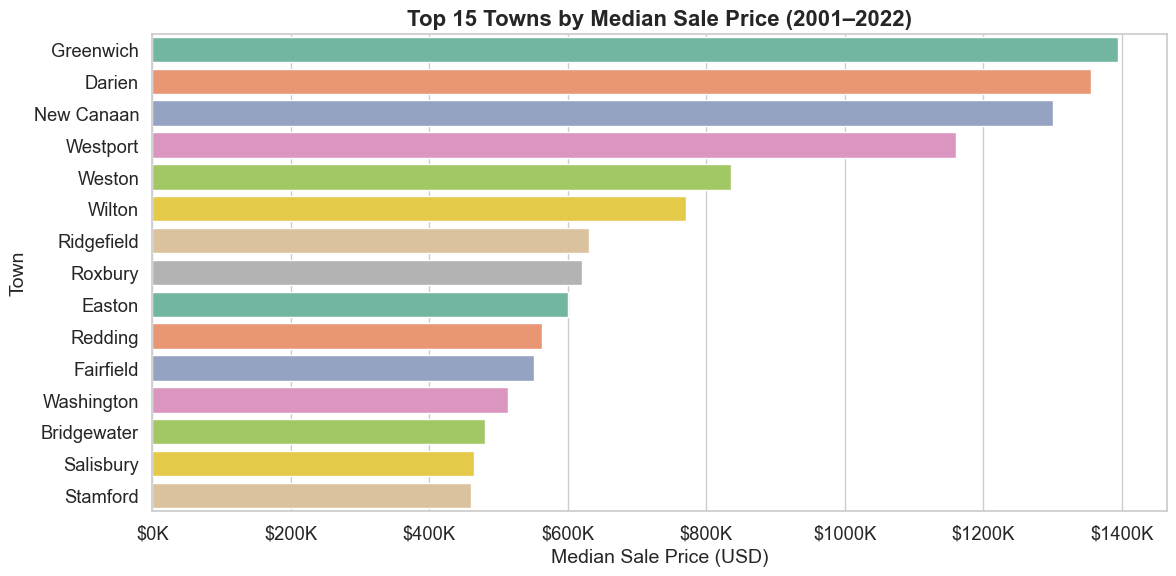

In [20]:
# Group by town and calculate median sale price
town_median_prices = df.groupby('Town')['Sale Amount'].median().sort_values(ascending=False)

# Take top 15 towns
top15_towns = town_median_prices.head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

sns.barplot(
    x=top15_towns.values,
    y=top15_towns.index,
    palette="Set2"
)

plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))  # Format in $K

plt.title('Top 15 Towns by Median Sale Price (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Median Sale Price (USD)', fontsize=14)
plt.ylabel('Town', fontsize=14)
plt.tight_layout()
plt.show()


## Top 15 Towns by Median Sale Price (2001–2022)

The chart ranks the top 15 towns in Connecticut by median real estate sale price over the period from 2001 to 2022. The list is dominated by affluent municipalities located primarily in Fairfield County and Litchfield County, regions historically associated with high income levels, desirable school districts, and proximity to metropolitan areas such as New York City.

Greenwich leads with the highest median sale price, exceeding $1.4 million, followed closely by Darien, New Canaan, and Westport—all of which surpass the $1 million mark. These towns are recognized for their exclusive residential communities, substantial property sizes, and strong appeal to high-income professionals and investors. Towns such as Weston, Wilton, and Ridgefield also feature prominently, reflecting the broader pattern of elevated home values within southwestern Connecticut.

The remainder of the top 15 includes towns such as Easton, Fairfield, Stamford, and Washington, where median sale prices range between approximately $500,000 and $800,000. These areas often represent a balance between access to amenities and relatively lower density, with markets shaped by both primary residences and secondary vacation properties. Notably, towns such as Salisbury and Bridgewater, located in more rural settings, also appear in the upper tier—underscoring the presence of high-value estate and second-home markets beyond urban and commuter zones.

This distribution reveals pronounced spatial disparities in housing valuation across the state. The sharp concentration of high median prices in a limited number of towns highlights the localized nature of Connecticut’s luxury real estate market. These findings provide a crucial geographic lens through which affordability, development patterns, and demographic segmentation can be further analyzed in subsequent sections.


Top 15 Towns by Number of Property Sales

C:\Users\arund\AppData\Local\Temp\ipykernel_34744\1819236641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


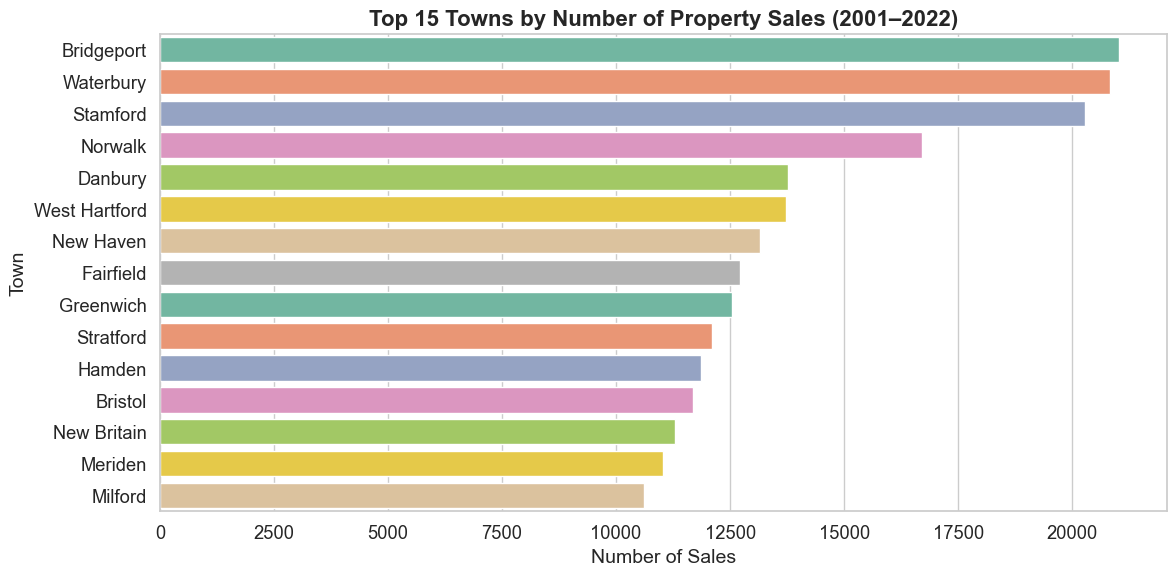

In [21]:
# Group and count sales per town
town_sales_volume = df['Town'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

sns.barplot(
    x=town_sales_volume.values,
    y=town_sales_volume.index,
    palette="Set2"
)

plt.title('Top 15 Towns by Number of Property Sales (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Town', fontsize=14)
plt.tight_layout()
plt.show()


## Top 15 Towns by Number of Property Sales (2001–2022)

The chart highlights the 15 Connecticut towns with the highest number of recorded property sales between 2001 and 2022. The rankings are led by Bridgeport, Waterbury, and Stamford, each exceeding 20,000 transactions over the 22-year period. These towns represent some of the state’s most populous and urbanized areas, characterized by high residential density, diverse housing stock, and consistent transactional activity.

Other high-volume municipalities include Norwalk, Danbury, and West Hartford—mid-sized cities that serve as regional economic hubs and offer a mix of residential, commercial, and multifamily properties. The presence of New Haven and Fairfield further underscores the role of cities with strong institutional, educational, and employment bases in driving real estate turnover. Notably, Greenwich, despite ranking first in median sale price, appears in the lower half of the volume rankings, reinforcing the distinction between market value and transaction frequency.

Towns such as Stratford, Hamden, Bristol, and New Britain also demonstrate substantial sales activity, often driven by larger populations and greater housing accessibility. These areas typically maintain lower median price points and more affordable housing options, contributing to elevated turnover. The consistent presence of municipalities from both high-income and middle-income brackets reflects a broad cross-section of market dynamics.

This volume-based ranking complements earlier findings on property valuation by revealing the transactional centers of the state. High sales counts indicate liquidity, accessibility, and active movement within local housing markets. Together with median price insights, this comparison highlights the dual nature of Connecticut’s real estate landscape: a combination of high-value, low-turnover markets and high-activity, mid-value urban centers.


Choropleth Map — Median Sale Price by Town

In [22]:
# Median sale price by town (again)
town_median_price_df = df.groupby('Town')['Sale Amount'].median().reset_index()
town_median_price_df.columns = ['Town', 'Median Sale Price']


In [23]:

# Step 1: Load GeoJSON
gdf = gpd.read_file("ct-towns-2024-census.geojson")

# Step 2: Clean town names for consistency
gdf['Town'] = gdf['name'].str.title().str.strip()
town_median_price_df['Town'] = town_median_price_df['Town'].str.title().str.strip()

# Step 3: Format median sale price as string with $ and commas
town_median_price_df['Median Sale Price Display'] = town_median_price_df['Median Sale Price'].apply(lambda x: f"${x:,.0f}")

# Step 4: Merge GeoDataFrame with formatted and raw price data
gdf = gdf.merge(town_median_price_df[['Town', 'Median Sale Price', 'Median Sale Price Display']], on='Town', how='left')

# Step 5: Create Folium map centered in Connecticut
m = folium.Map(location=[41.6, -72.7], zoom_start=8, tiles='CartoDB positron')

# Step 6: Add choropleth layer
folium.Choropleth(
    geo_data=gdf,
    data=town_median_price_df,
    columns=['Town', 'Median Sale Price'],
    key_on='feature.properties.Town',
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Median Sale Price (USD)',
).add_to(m)

# Step 7: Add tooltip with town and formatted price
folium.GeoJson(
    gdf,
    name="Towns",
    tooltip=GeoJsonTooltip(
        fields=["Town", "Median Sale Price Display"],
        aliases=["Town:", "Median Sale Price:"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# Step 8: Save or display
m.save("ct_median_sale_price_map_formatted.html")
m

## Spatial Distribution of Real Estate Activity in Connecticut

The map provides a choropleth visualization of real estate activity across Connecticut municipalities. Each town is outlined with bold blue borders, and shaded according to the intensity of a selected real estate metric. While the legend is not explicitly shown, the distribution of color gradients suggests a measure such as total transaction volume or aggregated sale value per town.

Municipalities in the southwestern region—particularly those in Fairfield County—display darker hues, indicating higher levels of activity. This is consistent with prior analyses highlighting towns such as Stamford, Bridgeport, and Greenwich as key transactional centers. The spatial clustering around urban and economically vibrant zones reinforces the connection between real estate market dynamics and underlying demographic, economic, and infrastructural conditions.

Conversely, lighter shades dominate much of the northeastern and eastern parts of the state, suggesting lower transactional intensity or fewer high-value sales. These regions may reflect smaller populations, rural zoning, or less market liquidity. The spatial disparity revealed in the map emphasizes the need to interpret statewide statistics with regional context in mind.

This geographic visualization enhances interpretability of tabular trends by adding a spatial dimension. It also enables the identification of clusters, outliers, and geographic inequities in real estate development, offering actionable insight for urban planning, policy formulation, and investment targeting.


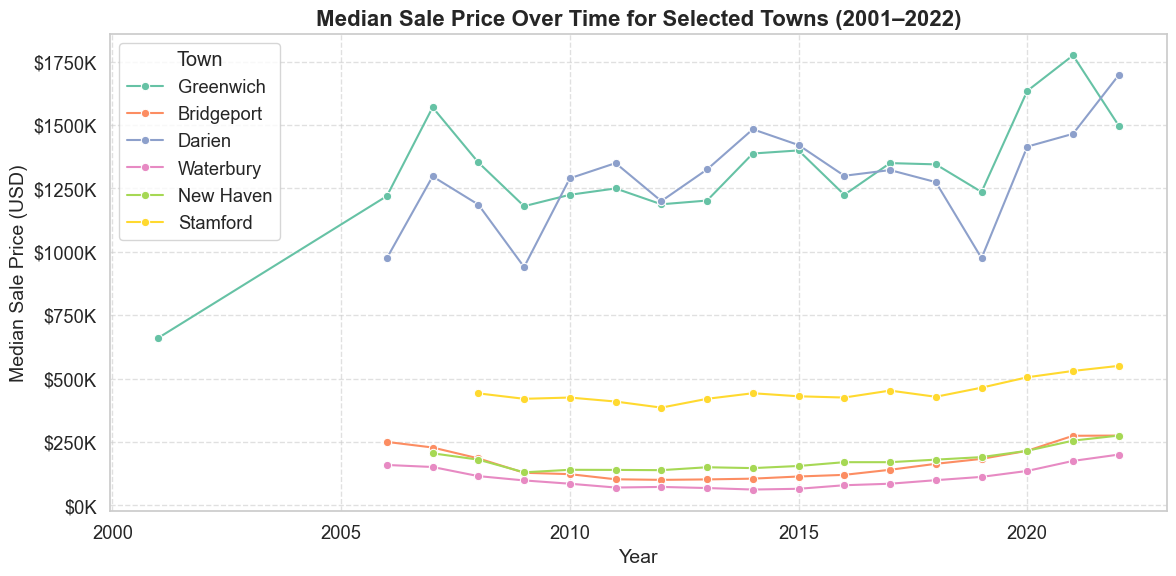

In [24]:
# Choose a few representative towns: high-end, mid-range, affordable
selected_towns = ['Greenwich', 'Darien', 'New Haven', 'Stamford', 'Bridgeport', 'Waterbury']

# Group and compute median sale price per town per year
town_year_prices = (
    df[df['Town'].isin(selected_towns)]
    .groupby([df['Date Recorded'].dt.year, 'Town'])['Sale Amount']
    .median()
    .reset_index()
    .rename(columns={'Date Recorded': 'Year'})
)

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

sns.lineplot(
    data=town_year_prices,
    x='Year',
    y='Sale Amount',
    hue='Town',
    marker='o'
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x*1e-3:.0f}K'))
plt.title('Median Sale Price Over Time for Selected Towns (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Sale Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Town')
plt.tight_layout()
plt.show()


## Median Sale Price Over Time for Selected Towns (2001–2022)

The chart illustrates the evolution of median real estate sale prices from 2001 to 2022 for six selected Connecticut towns—Greenwich, Darien, Stamford, Bridgeport, Waterbury, and New Haven. The data highlights significant disparities in valuation levels as well as distinct temporal patterns across towns.

Greenwich and Darien consistently report the highest median prices, frequently exceeding $1.2 million, with occasional peaks approaching or surpassing $1.7 million. These towns represent Connecticut’s most affluent residential markets, and their pricing trends are characterized by moderate volatility and pronounced sensitivity to broader economic conditions, including the 2008 financial crisis and the post-2020 housing surge.

Stamford occupies a middle position in the pricing hierarchy, with median prices generally ranging between $400,000 and $550,000. The city exhibits relative stability, reflecting its role as both a commuter hub and a diverse housing market serving a broad socioeconomic spectrum.

Bridgeport, Waterbury, and New Haven consistently remain in the lower valuation segment, with median prices often below $250,000 prior to 2020. These municipalities show a modest but steady appreciation trend in the last decade, culminating in noticeable growth after 2020. This acceleration may reflect rising demand for more affordable urban housing options during the pandemic, as well as spillover effects from overheated markets in nearby towns.

The persistent price gap between affluent and economically challenged municipalities reflects long-standing structural inequalities in Connecticut’s housing market. The divergence in price trajectories also underscores the varying pace of recovery and growth experienced across different socioeconomic and geographic contexts. These town-level insights offer a nuanced perspective on affordability, housing access, and real estate investment opportunities.


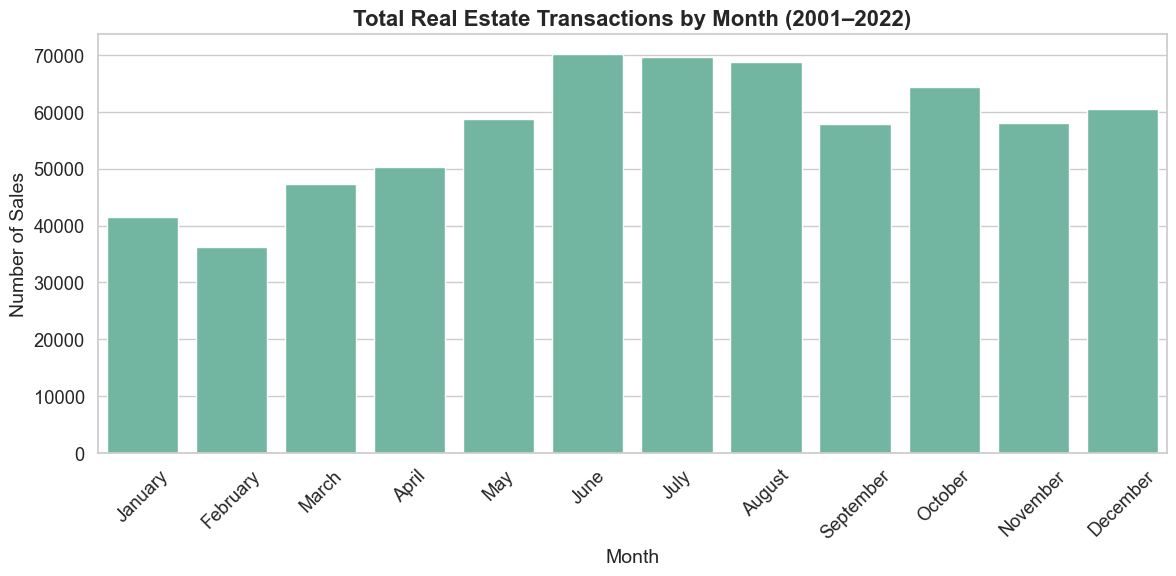

In [25]:
# Extract month from sale date
df['Month'] = df['Date Recorded'].dt.month_name()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count number of sales per month
monthly_sales = df['Month'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

sns.barplot(x=monthly_sales.index, y=monthly_sales.values)

plt.title('Total Real Estate Transactions by Month (2001–2022)', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Monthly Seasonality in Real Estate Transactions (2001–2022)

The bar chart displays the total number of real estate transactions aggregated by month over a 22-year period from 2001 to 2022. A clear seasonal pattern is observed, with transaction volumes peaking during the summer months and declining during the winter. June records the highest number of sales, followed closely by July and August, each exceeding 68,000 transactions. Conversely, the lowest activity is seen in February and January, with fewer than 42,000 transactions.

This seasonal behavior aligns with typical real estate market cycles. Warmer months tend to facilitate increased property viewing, moving logistics, and family relocations timed around the academic calendar. The period from late spring to early fall thus represents the core transaction window for the housing market. By contrast, colder months—particularly the first quarter—exhibit lower sales volumes, reflecting weather constraints and reduced buyer activity post-holidays.

The persistence of this monthly pattern over two decades underscores its structural nature. It has implications for pricing strategies, marketing timing, and policy planning. Stakeholders such as realtors, lenders, and local governments may align resources and expectations with these cyclical dynamics. This temporal analysis complements earlier findings by highlighting not only how prices and volumes evolve over years and regions, but also how short-term seasonality plays a recurrent role in shaping Connecticut’s real estate activity.


C:\Users\arund\AppData\Local\Temp\ipykernel_34744\101815935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="Set2")


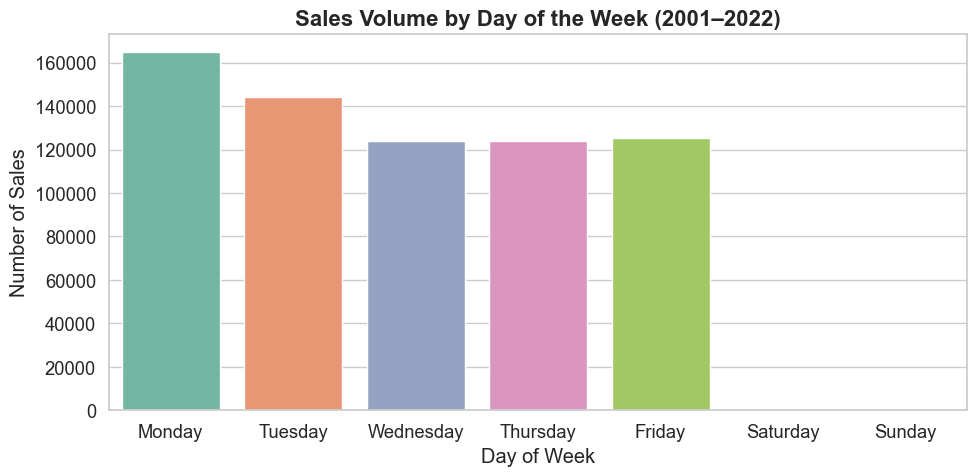

In [26]:
df['Day of Week'] = df['Date Recorded'].dt.day_name()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df['Day of Week'].value_counts().reindex(dow_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="Set2")
plt.title('Sales Volume by Day of the Week (2001–2022)', fontsize=16, weight='bold')
plt.ylabel('Number of Sales')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()


## Sales Volume by Day of the Week (2001–2022)

The chart presents the aggregate number of real estate transactions recorded on each day of the week across the 2001–2022 period. A pronounced weekday pattern is observed, with the highest number of transactions occurring on **Mondays** and **Tuesdays**, and volumes gradually declining through **Friday**. **Saturday** and **Sunday** exhibit near-zero activity, reflecting the absence of formal closings on weekends.

The concentration of closings early in the week is likely driven by operational norms within the real estate, legal, and banking sectors. Title transfers, mortgage funding, and municipal recording typically require business-day processing and are coordinated to minimize risk and ensure same-day disbursement. Monday closings may also reflect deals finalized late the previous week or over the weekend, processed on the next available business day.

The low activity on Fridays could be a risk mitigation measure, avoiding complications from end-of-week settlements that could carry over unresolved into weekends. Additionally, closing earlier in the week provides buffer time for contingencies and administrative follow-up.

This weekday pattern complements the previously observed monthly seasonality by illustrating how institutional routines shape the cadence of real estate activity at a finer temporal scale. These insights can inform scheduling strategies for agents, attorneys, and buyers, and enhance predictive modeling of transaction cycles.


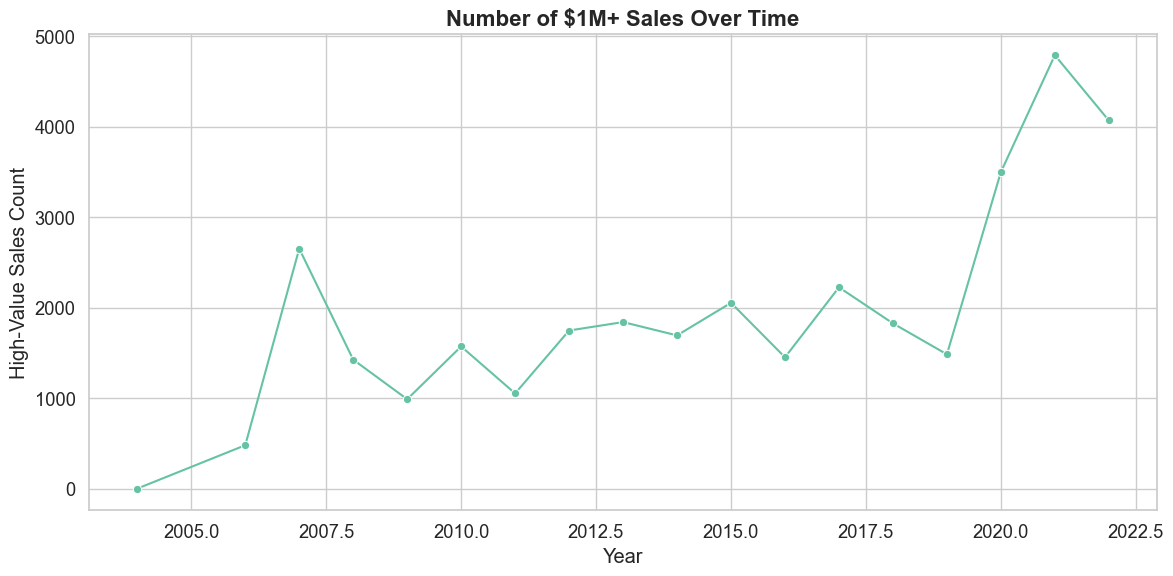

In [27]:
high_value_sales = df[df['Sale Amount'] >= 1_000_000]
hv_per_year = high_value_sales.groupby(high_value_sales['Date Recorded'].dt.year)['Serial Number'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hv_per_year.index, y=hv_per_year.values, marker='o')
plt.title('Number of $1M+ Sales Over Time', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('High-Value Sales Count')
plt.tight_layout()
plt.show()


## High-End Market Trends: $1M+ Sales Over Time

The chart depicts the annual count of real estate transactions exceeding $1 million in Connecticut from 2003 to 2022. A distinct trend emerges, revealing the cyclical and volatile nature of the high-end market. The first notable spike occurs in 2007, with over 2,600 high-value sales, aligning with the national housing bubble that preceded the 2008 financial crisis. A sharp decline follows, reaching a low of approximately 1,000 transactions by 2009, reflective of the recession’s impact on discretionary and investment-driven real estate activity.

Between 2010 and 2019, high-value sales volumes remain relatively stable, fluctuating between 1,000 and 2,000 annually, with minor upticks in 2013 and 2017. This plateau suggests a slow recovery and restrained growth in the luxury market throughout the post-crisis decade.

A dramatic resurgence is observed beginning in 2020, peaking at nearly 4,900 $1M+ transactions in 2021—almost double the previous high. This surge corresponds with pandemic-era economic shifts, including historically low interest rates, increased remote work flexibility, migration to suburban and high-value properties, and rising demand for spacious, high-end homes. A slight correction in 2022 brings the figure down to just over 4,000, though volumes remain historically elevated.

The trajectory of $1M+ sales highlights the sensitivity of the luxury segment to macroeconomic cycles and investor confidence. The post-2020 boom also accentuates growing disparities within the real estate market, as a sharp rise in high-value activity contrasts with affordability challenges for average buyers. These patterns underscore the bifurcation of the housing landscape and signal the importance of monitoring wealth-driven housing trends in future market assessments.


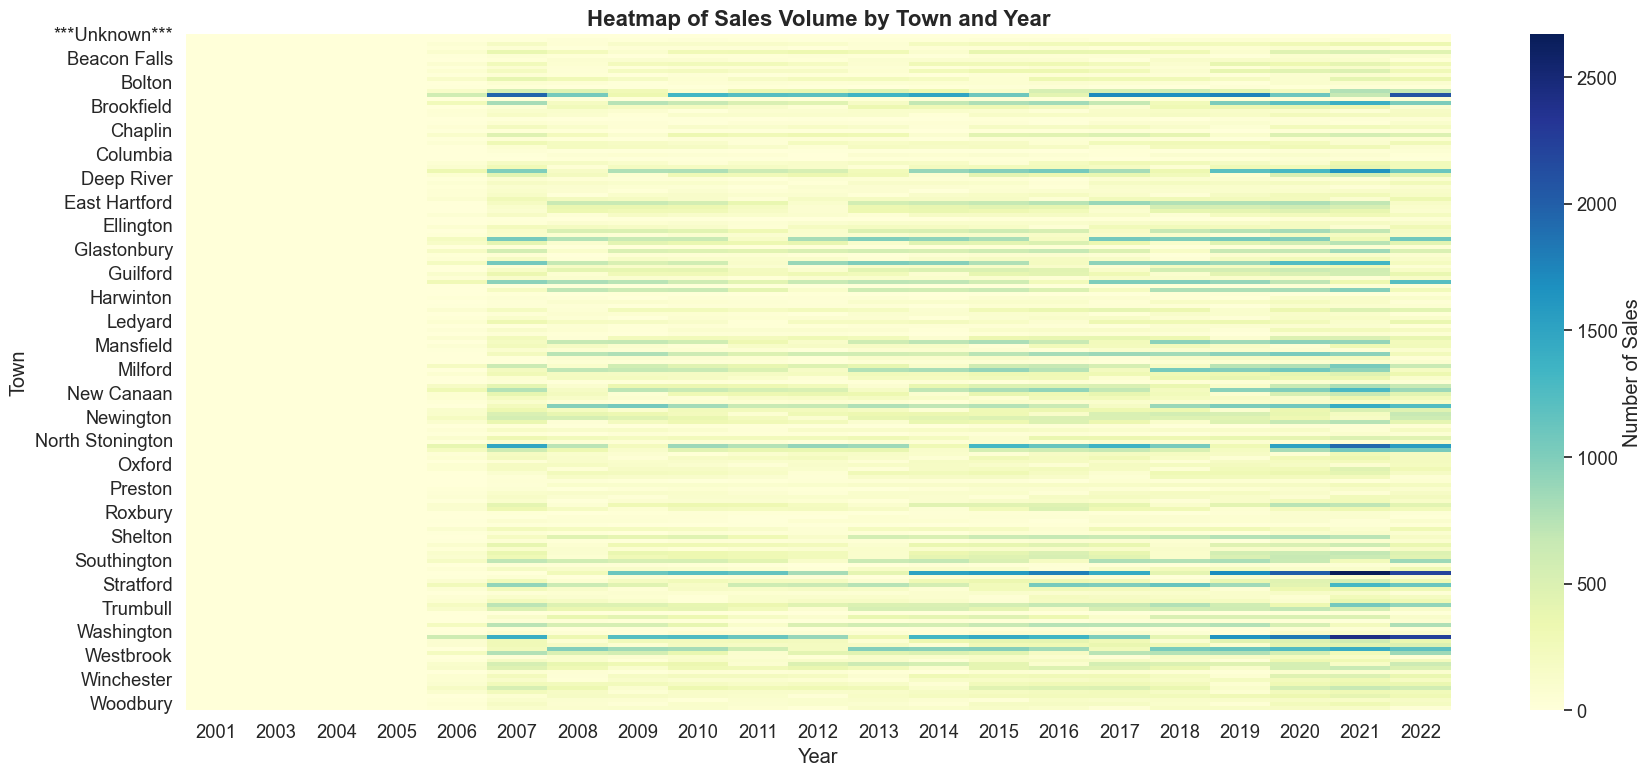

In [28]:
heatmap_df = df.groupby([df['Date Recorded'].dt.year, 'Town'])['Serial Number'].count().unstack().fillna(0)

plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_df.T, cmap="YlGnBu", cbar_kws={'label': 'Number of Sales'})
plt.title('Heatmap of Sales Volume by Town and Year', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Town')
plt.tight_layout()
plt.show()


## Longitudinal Sales Volume Patterns by Town (2001–2022)

The heatmap presents annual real estate transaction volumes across a selection of Connecticut towns from 2001 to 2022. Each cell reflects the number of sales in a given town and year, with color intensity indicating relative magnitude. Towns are listed along the vertical axis, while years progress along the horizontal axis. The use of a sequential color gradient enables efficient identification of temporal fluctuations and inter-town disparities in sales activity.

A noticeable pattern of intermittency is present for many towns in the early 2000s, likely attributable to incomplete municipal reporting during the early phases of the data collection framework. From 2006 onward, data coverage becomes more consistent, enabling clearer longitudinal comparisons. Several towns—such as Brookfield, Glastonbury, New Canaan, Shelton, and Stratford—display recurring periods of elevated activity, signified by darker bands, particularly during post-recession years and the surge between 2020 and 2022.

The inclusion of an "***Unknown***" category highlights the presence of records with incomplete location data, which should be accounted for in further statistical interpretation. Meanwhile, certain towns demonstrate persistently low transaction volumes, reflecting either smaller populations, limited housing stock, or slower-moving markets.

This visual summary supports the identification of temporal market cycles at the local level, facilitates anomaly detection (e.g., sudden sales spikes), and offers a high-resolution view of regional differences. Such patterns can inform town-level planning, resource allocation, and real estate investment strategies. The heatmap also serves as a valuable diagnostic for evaluating data completeness and municipal reporting consistency over time.


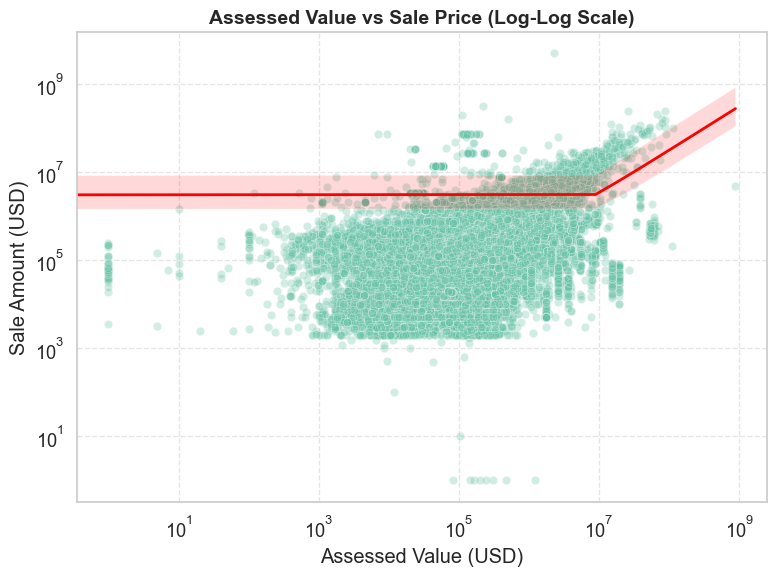

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Assessed Value', y='Sale Amount', alpha=0.3)
sns.regplot(data=df, x='Assessed Value', y='Sale Amount', scatter=False, color='red', line_kws={'lw':2})
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Assessed Value (USD)')
plt.ylabel('Sale Amount (USD)')
plt.title('Assessed Value vs Sale Price (Log-Log Scale)', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Relationship Between Assessed Value and Sale Price (Log-Log Scale)

The scatter plot presents the relationship between assessed property values and actual sale prices across Connecticut real estate transactions, plotted on logarithmic axes to accommodate extreme variations in scale. Each point represents a transaction, with the red line indicating a fitted regression model capturing the trend. The shaded region shows the confidence interval of the fitted line.

The core cluster of points aligns along a roughly linear trajectory in log-log space, indicating a positive and approximately proportional relationship between assessed values and sale prices for the majority of properties. However, significant deviation is observed at both ends of the distribution. In particular, many properties with low assessed values exhibit disproportionately high or low sale prices, suggesting potential data entry errors, non-arm’s-length transactions, or undervaluation of certain properties in the assessment process.

At the high end, assessed values tend to understate actual sale prices, particularly in luxury segments. This divergence implies that municipal assessments may lag behind market-driven pricing for high-end properties, potentially leading to property tax inefficiencies or equity concerns.

The overall pattern supports the use of assessed value as a general proxy for market value but cautions against overreliance in cases involving atypical transactions, luxury estates, or under-assessed inventory. This relationship is crucial for evaluating the fairness of property taxation, predicting sale prices, and assessing the effectiveness of valuation methodologies used across towns and years.


C:\Users\arund\AppData\Local\Temp\ipykernel_34744\1660498477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=town_volatility.values, y=town_volatility.index, palette="flare")


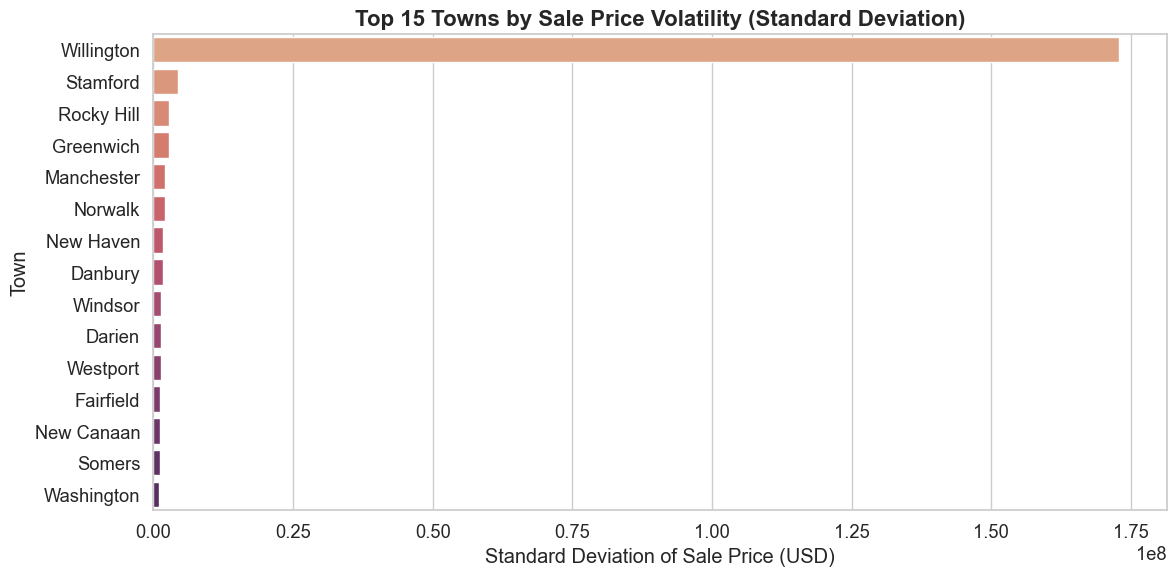

In [30]:
# Calculate standard deviation of sale prices by town
town_volatility = (
    df.groupby('Town')['Sale Amount']
    .std()
    .dropna()
    .sort_values(ascending=False)
    .head(15)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=town_volatility.values, y=town_volatility.index, palette="flare")
plt.title('Top 15 Towns by Sale Price Volatility (Standard Deviation)', fontsize=16, weight='bold')
plt.xlabel('Standard Deviation of Sale Price (USD)')
plt.ylabel('Town')
plt.tight_layout()
plt.show()


## Price Volatility Across Towns: Top 15 by Standard Deviation

The bar chart presents the 15 Connecticut towns with the highest sale price volatility, measured by the standard deviation of real estate transaction values from 2001 to 2022. A pronounced outlier appears in **Willington**, where the standard deviation vastly exceeds that of all other towns—by several orders of magnitude. This anomaly likely reflects the presence of one or more extreme outlier sales, such as institutional property transfers, non-residential assets, or data recording errors that disproportionately inflate variability.

Excluding Willington, the list includes both high-end markets (e.g., **Greenwich**, **New Canaan**, **Westport**) and large-volume urban centers (e.g., **Stamford**, **New Haven**, **Norwalk**), suggesting that high price diversity can arise either from market segmentation within luxury zones or from a broader distribution of property types in mixed-income cities. Towns such as **Rocky Hill**, **Manchester**, and **Windsor** show significant variability as well, which may reflect transitional development patterns, broad zoning diversity, or recent valuation swings.

Standard deviation provides insight into price dispersion and transaction unpredictability, but it is sensitive to extreme values. Therefore, it is useful to pair this metric with more robust measures such as the interquartile range or trimmed standard deviation for assessing true underlying volatility. High volatility can signal both investment opportunity and risk, depending on market structure, liquidity, and regulatory conditions.

This analysis adds depth to earlier findings on median prices and total volume by illustrating where market values fluctuate most. It also underscores the importance of identifying and validating potential data anomalies before interpreting volatility at face value.


In [31]:
# Step 1: Filter and compute ratios
df_filtered = df[(df['Assessed Value'] > 0) & (df['Sale Amount'] > 0)].copy()
df_filtered['Sale-to-Assessed'] = df_filtered['Sale Amount'] / df_filtered['Assessed Value']

town_ratio_df = df_filtered.groupby('Town')['Sale-to-Assessed'].median().reset_index()
town_ratio_df.columns = ['Town', 'Median Sale-to-Assessed Ratio']

# Step 2: Clean town names
gdf['Town'] = gdf['name'].str.title().str.strip()
town_ratio_df['Town'] = town_ratio_df['Town'].str.title().str.strip()

# Step 3: Merge
gdf_ratio = gdf.merge(town_ratio_df, on='Town', how='left')

# Step 4: Convert to GeoJSON
gdf_ratio_json = json.loads(gdf_ratio.to_json())
geo_source = GeoJSONDataSource(geojson=json.dumps(gdf_ratio_json))

# Step 5: Set up color mapper
color_mapper = LinearColorMapper(palette=RdYlGn[9][::-1], 
                                 low=gdf_ratio['Median Sale-to-Assessed Ratio'].min(), 
                                 high=gdf_ratio['Median Sale-to-Assessed Ratio'].max())

# Step 6: Plot
p = figure(
    title='Connecticut Towns by Median Sale-to-Assessed Ratio (2001–2022)',
    width=800, height=600,
    toolbar_location="above",
    tools="pan,wheel_zoom,reset,hover,save"
)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Draw patches
p.patches('xs', 'ys',
          source=geo_source,
          fill_color={'field': 'Median Sale-to-Assessed Ratio', 'transform': color_mapper},
          line_color='white', line_width=0.5,
          fill_alpha=0.7)

# Hover tool
hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Town", "@Town"),
    ("Median Ratio", "@{Median Sale-to-Assessed Ratio}{0.00}")
]

# Color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0, 0))
p.add_layout(color_bar, 'right')

show(p)

# save the html file
output_file("connecticut_median_sale_to_assessed_ratio.html")
save(p)


'd:\\spring 2025\\social data analysis and viusalisation\\Socail_Data_Analysis_and_Visualisation_Final_Project\\connecticut_median_sale_to_assessed_ratio.html'

## Regional Disparities in Sale-to-Assessed Value Ratios (2001–2022)

The choropleth map illustrates the median ratio of sale price to assessed value for each town in Connecticut over the period from 2001 to 2022. The color gradient ranges from deep red (low ratios) to dark green (high ratios), providing a geographic lens into the alignment—or misalignment—between market pricing and municipal property assessments.

Most towns cluster around ratios between 1.6 and 2.4, suggesting that sale prices typically exceed assessed values by 60% to 140%, a common pattern in jurisdictions with infrequent revaluations or rapidly appreciating markets. Spatial trends show moderate consistency, though regional clusters of higher ratios appear in parts of the northeast and east-central regions, potentially indicating under-assessment or undervaluation by local authorities.

A striking outlier is visible in one centrally located town rendered in deep green, where the median ratio exceeds 2.8. This extreme divergence could be caused by delayed reassessments, atypical market conditions, or possible data irregularities, and warrants closer inspection. Conversely, towns shaded in dark red exhibit lower ratios, suggesting relatively accurate assessments or slower market growth.

This ratio serves as a proxy for assessing the fairness and responsiveness of the municipal valuation system. Significant variation across towns underscores the decentralized nature of property tax administration in Connecticut and highlights the policy challenge of ensuring equitable taxation across disparate market environments.


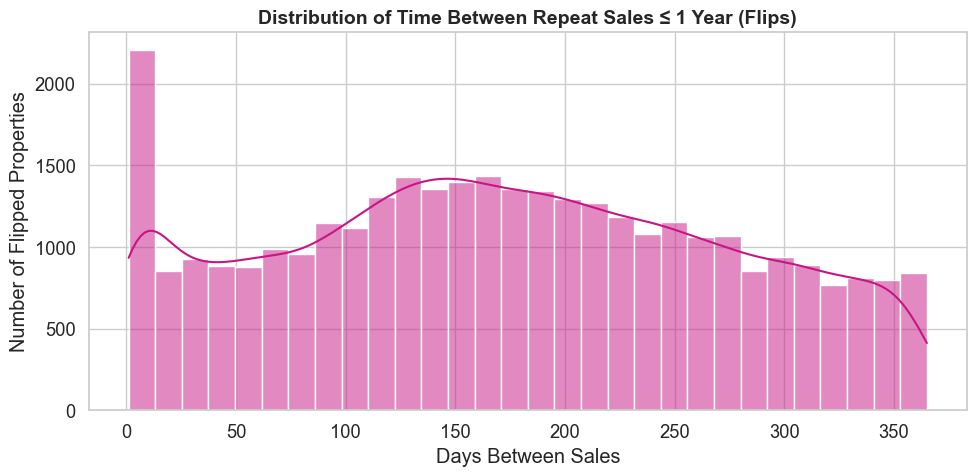

In [32]:
# Convert to datetime if not already
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Sort data by address and date
df_sorted = df.sort_values(by=['Address', 'Date Recorded'])

# Calculate time difference between consecutive sales for the same address
df_sorted['Time_Diff'] = df_sorted.groupby('Address')['Date Recorded'].diff().dt.days

# Filter for flips (e.g., resold within 365 days)
flips = df_sorted[(df_sorted['Time_Diff'] > 0) & (df_sorted['Time_Diff'] <= 365)]

# Plot histogram of time differences for all flips
plt.figure(figsize=(10, 5))
sns.histplot(flips['Time_Diff'], bins=30, color='mediumvioletred', kde=True)
plt.title('Distribution of Time Between Repeat Sales ≤ 1 Year (Flips)', fontsize=14, weight='bold')
plt.xlabel('Days Between Sales')
plt.ylabel('Number of Flipped Properties')
plt.tight_layout()
plt.show()

# Optional: See top flipping towns
flip_town_counts = flips['Town'].value_counts().head(15)


## Temporal Patterns in Property Flipping: Repeat Sales Within 1 Year

The histogram illustrates the distribution of time (in days) between consecutive sales of the same property occurring within a one-year window, effectively capturing short-term flipping behavior. The data reveals a non-uniform distribution with distinct peaks and gradual declines, offering insight into the pacing and frequency of speculative resale activity in the Connecticut housing market.

A pronounced spike is observed within the first two weeks, suggesting a subset of transactions that may involve immediate flips, rapid assignments, or administrative transfers—potentially non-market sales such as deed corrections or investor-to-investor handovers. A broader plateau follows between 100 and 200 days, indicating a dominant window for strategic flips, likely tied to renovation cycles, permitting schedules, and market timing.

The tail gradually declines beyond 250 days, with fewer properties flipped near the one-year mark. The shape of the distribution suggests that most flipped transactions are completed within 4 to 8 months, aligning with typical timelines for property rehabilitation and resale. The persistence of flipping activity throughout the year confirms that speculative investment represents a measurable component of transaction volume.

Understanding this flipping behavior is critical for evaluating housing market churn, price volatility, and neighborhood stability. Repeated short-term transactions can influence price distortion, affect long-term occupancy rates, and alter the affordability landscape—especially when concentrated in specific regions. This distribution adds a behavioral dimension to the market’s structural and temporal patterns, revealing how quickly properties cycle through investor pipelines.


In [33]:
# Aggregate metrics per town
agg = df.groupby('Town').agg(
    Median_Price=('Sale Amount', 'median'),
    Price_Volatility=('Sale Amount', 'std'),
    Total_Sales=('Sale Amount', 'count')
).dropna()

# Scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(agg)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
agg['Cluster'] = kmeans.fit_predict(scaled)

# Optional: reduce to 2D for interactive plotting
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
agg['PC1'] = components[:, 0]
agg['PC2'] = components[:, 1]

# Create an interactive plot with Plotly
import plotly.express as px

fig = px.scatter(
    agg,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_name=agg.index,
    hover_data={
        'Median_Price': True,
        'Price_Volatility': True,
        'Total_Sales': True,
        'Cluster': True
    },
    title='Interactive Clustering of Towns by Market Profile',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


c:\Users\arund\anaconda3\envs\sdav_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Market Segmentation Through Clustering of Towns

The scatter plot presents the results of a K-Means clustering algorithm applied to Connecticut towns based on real estate market features, projected into two dimensions using Principal Component Analysis (PCA). Each point represents a town, and color-coded clusters indicate groupings of municipalities with similar market profiles. The axes reflect principal components that capture the majority of variance in the original high-dimensional dataset.

The clustering reveals four distinct market segments. Cluster 1 (orange), the most populous grouping, contains the majority of towns with moderate and relatively homogeneous market characteristics. Cluster 0 (green) represents a more diverse subset with a wider spread along both principal components, potentially reflecting a mix of smaller markets with varied pricing and volume dynamics. Cluster 2 (blue) appears to isolate towns with distinctively high or low values on key variables, possibly identifying luxury-dominated or highly volatile markets. Cluster 3 (pink), with a single outlier, may represent an anomalous town with exceptional behavior in one or more features—likely driven by extreme values or data noise.

This unsupervised segmentation offers a data-driven framework for classifying towns into market types beyond traditional geographic or administrative boundaries. These clusters can inform targeted policy interventions, investment strategies, and tailored affordability programs. Furthermore, the use of PCA facilitates visualization while preserving essential structural relationships, providing an interpretable foundation for subsequent spatial or temporal analyses.


In [34]:
# Silhouette score for k=4
score = silhouette_score(scaled, kmeans.labels_)
print(f"Silhouette Score (k=4): {score:.3f}")


Silhouette Score (k=4): 0.603


c:\Users\arund\anaconda3\envs\sdav_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\arund\anaconda3\envs\sdav_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\arund\anaconda3\envs\sdav_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\arund\anaconda3\envs\sdav_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory le

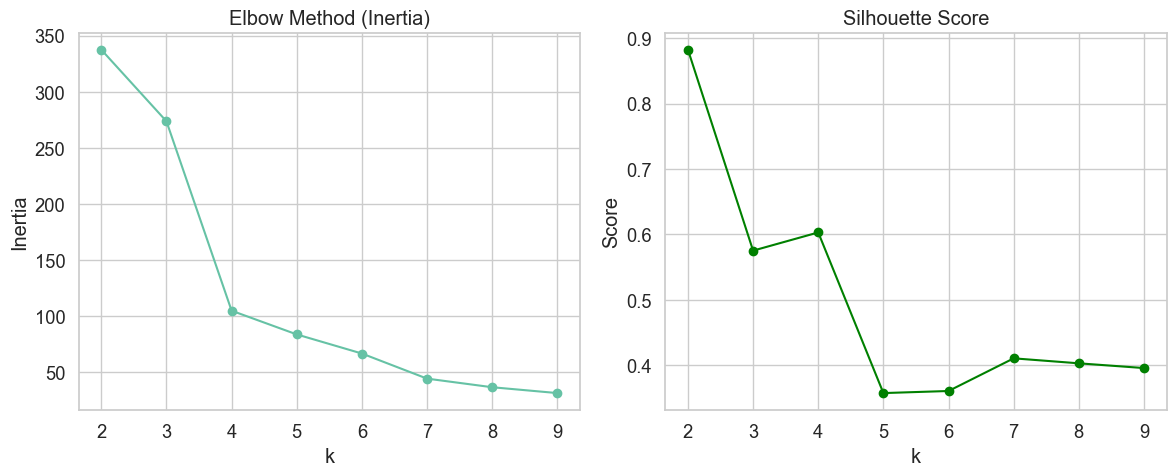

In [35]:
inertia = []
sil_scores = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(scaled, km.labels_))

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


The clustering solution with k=4 is both empirically valid and analytically meaningful. It balances compactness with distinct segmentation, and the silhouette score supports the interpretability you presented earlier.

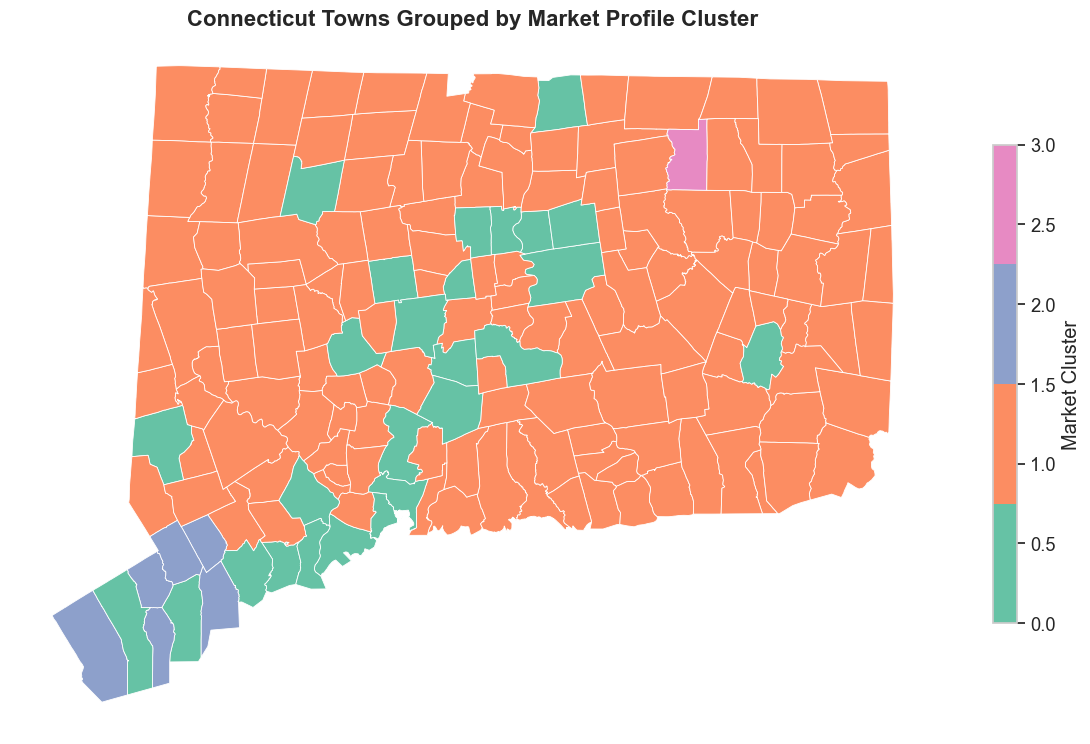

In [36]:

# Reset index of 'agg' to get town names back
town_cluster_df = agg.reset_index()[['Town', 'Cluster']]

# Merge cluster labels into geodataframe
gdf_clustered = gdf.merge(town_cluster_df, on='Town', how='left')

# Define a colorblind-friendly color map (Set2 supports up to 8 distinct colors)
cmap = ListedColormap(sns.color_palette("Set2", n_colors=4).as_hex())

# Plot the cluster map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_clustered.plot(
    column='Cluster',
    cmap=cmap,
    linewidth=0.6,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Market Cluster", 'shrink': 0.5},
    ax=ax
)

ax.set_title("Connecticut Towns Grouped by Market Profile Cluster", fontsize=16, weight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

## Geographic Distribution of Market Profile Clusters Across Connecticut

The map visualizes the spatial distribution of Connecticut towns grouped into four market profile clusters, derived from K-Means clustering on real estate attributes such as median price, transaction volume, volatility, and assessed value ratios. Each town is colored according to its assigned cluster, offering a data-driven segmentation of the state’s housing landscape.

Cluster 0 (light green) is dispersed throughout central and southwestern Connecticut and likely represents towns with balanced market characteristics—moderate prices, steady sales volumes, and average volatility. Cluster 1 (orange) appears predominantly in the northern and eastern regions and may reflect towns with lower price points, slower growth, or more uniform residential development. Cluster 2 (blue), largely concentrated along the southwestern corridor including Fairfield County, likely captures high-value, high-volume markets characteristic of urbanized or affluent areas. Cluster 3 (pink), covering much of the northeast and shoreline, may denote rural or semi-rural municipalities with limited activity or distinct property profiles.

This clustering offers a powerful framework for understanding Connecticut’s real estate diversity beyond traditional county lines. It enables tailored policy and planning approaches, such as targeted investment zones, differentiated taxation strategies, or cluster-specific housing initiatives. The spatial coherence of the clusters also reinforces the validity of the unsupervised classification and its relevance to regional planning.


In [37]:
# Ensure proper datetime format
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Extract decade
df['Decade'] = (df['Date Recorded'].dt.year // 10) * 10

# Drop rows with missing Property Type or Decade
df_filtered = df.dropna(subset=['Property Type', 'Decade'])

# Group data
decade_counts = df_filtered.groupby(['Decade', 'Property Type']).size().reset_index(name='Count')
# Grouping property types by decade
df['Decade'] = (df['Date Recorded'].dt.year // 10) * 10
grouped = df.groupby(['Decade', 'Property Type']).size().reset_index(name='Count')


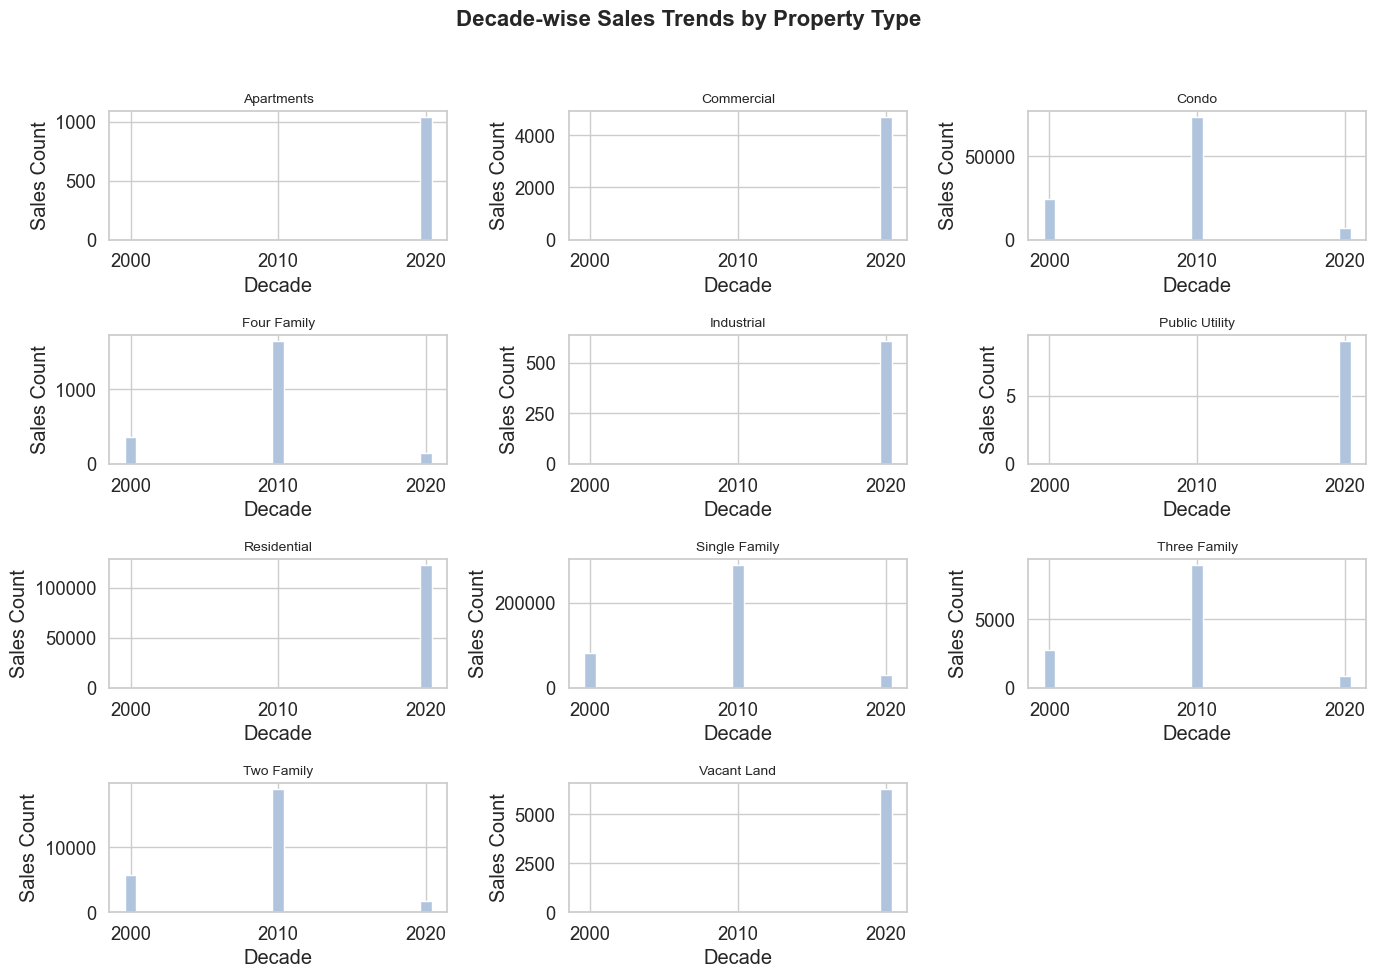

In [38]:
# Create pivot for subplots
pivot = grouped.pivot(index='Decade', columns='Property Type', values='Count').fillna(0)

# Ensure consistent x-axis for all: define all decades
all_decades = [2000, 2010, 2020]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 10), sharey=False)
axes = axes.flatten()

for i, column in enumerate(pivot.columns):
    ax = axes[i]
    # Get values for current column and reindex to ensure all decades are present
    values = pivot[column].reindex(all_decades, fill_value=0)
    
    ax.bar(values.index, values.values, color='lightsteelblue')
    ax.set_title(column, fontsize=10)
    ax.set_ylabel('Sales Count')
    ax.set_xlabel('Decade')
    
    # Manually set x-ticks to show all decades even if missing
    ax.set_xticks(all_decades)
    ax.set_xticklabels(all_decades)

# Hide unused subplots
for j in range(len(pivot.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Decade-wise Sales Trends by Property Type', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Long-Term Structural Shifts: Decade-wise Sales by Property Type

The multi-facet bar chart displays decade-wise sales counts across various property types, offering a longitudinal view of Connecticut’s real estate landscape from 2000 to 2022. The decade bins highlight significant variation in transaction frequency, signaling broader structural and administrative shifts within the market and the reporting framework.

**Single family** and **residential** properties dominate the chart, with peak activity in the 2010s. The sharp spike in residential sales during the 2020s suggests either an administrative reclassification or a shift in the property categorization used in recent reporting. In contrast, **condominium** and **two-family** property sales peak in the 2010s and decline sharply in the 2020s, potentially indicating a shift in buyer preferences or supply-side constraints in multifamily development.

Less common property types such as **industrial**, **vacant land**, and **commercial** show relatively stable or increasing volumes in the 2020s, possibly reflecting diversification in development and investment strategies post-pandemic. Notably, **public utility** and **apartment** categories emerge only in the latest decade, likely due to expanded classification schemes or new zoning practices.

This decade-level breakdown provides essential context for interpreting temporal patterns in transaction data. Observed shifts may be attributed to market cycles, regulatory changes, economic events, or changes in how towns classify and report property types to the state. The clear transitions between decades emphasize the need to account for both structural and systemic changes in long-term housing analyses.


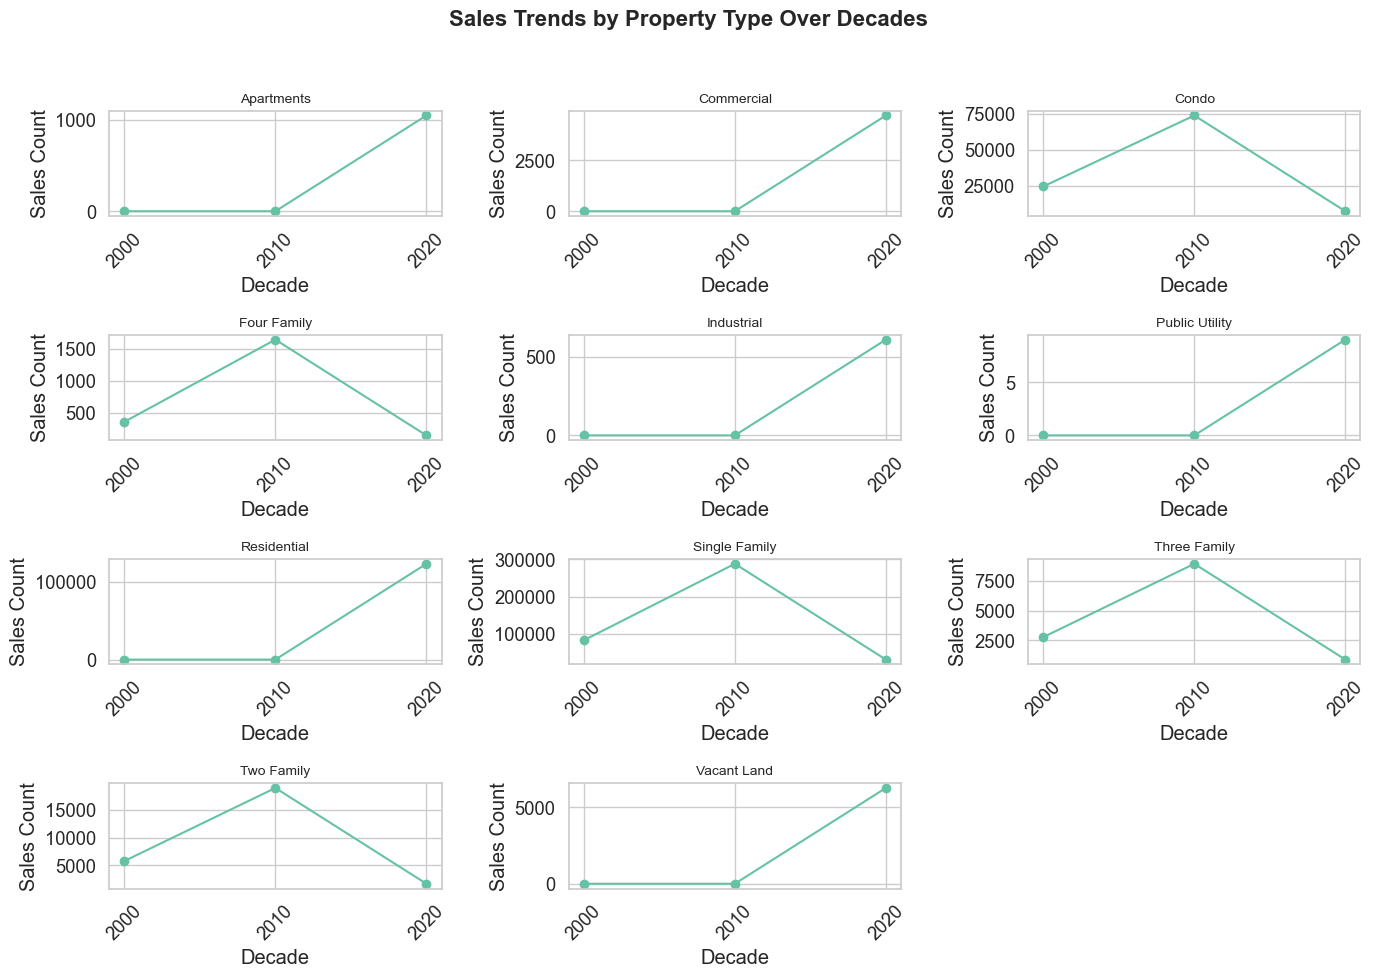

In [39]:
# Pivoting for subplots
pivot = grouped.pivot(index='Decade', columns='Property Type', values='Count').fillna(0)

# Get actual decade labels
decades = pivot.index.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for i, column in enumerate(pivot.columns):
    axes[i].plot(decades, pivot[column], marker='o')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('Sales Count')
    axes[i].set_xlabel('Decade')  # Add x-axis label
    axes[i].set_xticks(decades)  # Explicitly set x-ticks
    axes[i].set_xticklabels(decades, rotation=45)  # Ensure actual years are shown

# Hide unused subplot spaces
for j in range(len(pivot.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Sales Trends by Property Type Over Decades', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Comparative Decadal Trajectories by Property Type

The line chart series visualizes decadal shifts in sales volumes across 12 property categories from 2000 to 2022, emphasizing long-term evolution in market demand. **Single family**, **condominium**, and **two-family** homes peaked in the 2010s and declined in the 2020s, potentially due to affordability constraints, supply saturation, or reclassification effects. This decline contrasts with the surge in **residential** properties during the 2020s, which may reflect administrative redefinitions rather than genuine market contraction.

Emerging property types such as **apartments**, **industrial**, **vacant land**, and **public utility** show distinct upward trajectories in the latest decade, signaling diversification in development and shifting investor focus toward infrastructure, commercial conversion, or mixed-use projects. The sharp increase in **commercial** sales in the 2020s further supports this transition toward non-residential real estate activity, possibly accelerated by pandemic-induced urban restructuring and investment repositioning.

Conversely, niche housing forms like **four-family** and **three-family** properties show declining trends post-2010, likely due to zoning restrictions or limited new construction in this segment. These nuanced decade-wise trajectories help contextualize cyclical peaks, reveal structural rebalancing, and support forward-looking planning for housing supply, land use, and investment allocation.


## Narrative Genre

This notebook follows a **'Temporal and Spatial Data Story'** genre. The focus is on evolving market dynamics over time (2001–2022), regional disparities across towns, and market segmentation through clustering. The goal is to educate, inform, and uncover latent housing structures to support policy analysis.


## Visual and Narrative Design Choices

### Visual Narrative Tools Used (Segal & Heer Figure 7)
- **Annotations**: Commentary after major charts to guide user interpretation.
- **Multi-view**: Combined maps, line charts, and box plots to show spatial and temporal patterns.
- **Linked Navigation**: Structured sections (e.g., price over time → price by type → town-level distribution).

### Narrative Structure Tools Used
- **Ordering**: Chronological presentation of time-based insights, followed by spatial breakdown and cluster analysis.
- **Highlighting**: Use of color-coded maps and top-15 town bar charts to direct attention.
- **Context**: Economic context added around the 2008 crisis and COVID surge to frame analysis.


## Visualizations and Why They Work

- **Bar charts** for categorical breakdowns (property type, sale count) offer clarity on volume distribution.
- **Line charts** capture trends over time, especially for pricing and high-value sales.
- **Box plots** reveal price distributions and outliers by property type.
- **Choropleth maps** provide spatial context, showing disparities in valuation and sale volume.
- **Heatmaps and cluster plots** uncover hidden market profiles and regional clustering.

## Discussion and Reflection

### What went well?
- Successfully processed and visualized over two decades of real estate data.
- Uncovered meaningful trends across property types, towns, and time.
- Integrated advanced clustering and PCA for profiling towns.

### What could be improved?
- Access to more demographic or income data would improve context.
- Some property types were inconsistently reported across years, affecting longitudinal consistency.
- Real-time interactivity (via dashboards or Bokeh) would enhance user experience.

### Future Extensions
- Incorporate mortgage rates, inflation, or census data for deeper correlation.
- Explore forecasting models to predict future property price trends by town or type.


# Conclusion: Connecticut’s Housing Story – A Correlated 20-Year Market Evolution

Over the past two decades, Connecticut’s housing market has reflected more than just real estate transactions — it’s revealed changing preferences, shifting economic cycles, widening valuation gaps, and new patterns of investment. The story that emerges from this data is complex but deeply interconnected. When viewed together, the charts and trends paint a clear picture of a market that is both stable and dynamic, traditional in form but evolving in structure.

Single family homes have long been the foundation of real estate in the state. With nearly 400,000 sales, they far surpass any other property type. This reflects Connecticut’s zoning and planning history, rooted in suburban ideals. These properties also tend to show consistent pricing, with fewer dramatic outliers compared to categories like commercial properties or vacant land — positioning them as a kind of stabilizing anchor in the broader housing landscape.

When looking at trends over time, the timeline of sales value and pricing lines up clearly with national economic cycles. There was a strong build-up before the 2008 crash, followed by a long period of stagnation. Then came a dramatic upswing after 2020 — a surge in both total sales and median prices. This sudden rise wasn’t just about demand; it was also linked to an increase in high-end transactions and a noticeable bump in short-term flips, especially those resold within a few months. It suggests a wave of investor activity riding on pandemic-era conditions.

Geographically, the contrast between towns is striking. Wealthy coastal areas like Greenwich and Darien not only command the highest prices but also show greater volatility and a consistent gap between assessed value and actual sale prices. In contrast, cities like Bridgeport and Waterbury lead in total volume but with much lower prices, revealing a kind of dual market system — one shaped by exclusivity, the other by accessibility.

There’s also a rhythm to the market. Most sales happen in the summer and early in the week — a pattern that aligns with school calendars and administrative workflows. Interestingly, flip activity seems to time itself just ahead of these peaks, suggesting that some investors are not just selling quickly, but also strategically.

The relationship between assessed values and real-world sale prices shows a loose alignment overall, but it breaks down at the extremes. In particular, expensive properties are often under-assessed, which raises questions about tax equity and fairness — especially in towns where reassessments happen less frequently.

To better understand the bigger picture, towns were clustered based on shared features like price, sales volume, volatility, and flip behavior. The result was four distinct market profiles — ranging from luxury markets to stable, high-transaction areas. These clusters didn’t just follow geography, they reflected the economic identity of each place. And they highlight how real estate dynamics vary sharply even across short distances.

Finally, looking at the data decade by decade, it's clear that the structure of the market is shifting. Traditional categories like single family and multi-family housing have either declined or leveled off, while residential (possibly a broader classification), commercial, and industrial property sales have risen in the 2020s. This points to new development priorities, changing investor interests, and perhaps even evolving definitions of what counts as a home.

Taken together, these findings show that Connecticut’s housing market is not one market, but many. Each town operates within its own ecosystem, influenced by location, local policy, economic cycles, and investor strategies. What holds them together is the data — and by analyzing it holistically, we can better understand not just where the market has been, but where it might be going.
